```
python demo.py --video_path ../data/short-kavanaugh.mp4 --cuda --dataset wider_face --load_dir output --checkpoint 25759 --checkepoch 18
```

# Purpose

Of this notebook is to examine the usage of Facenet on a test video. Goal is to create a new file, where the embedding of the person is attached as a new column.

In [88]:
import tensorflow as tf
import numpy as np
from PIL import Image
from scipy.misc import imresize


class Facenet:
    def __init__(self):
        self.sess = Facenet._load_model()
        self.image_size = 160

    def image_to_embedding(self, image):
        # image: width x height x 3
        return self._run(image_batch=[self._preprocess(image)])

    def batch_image_to_embedding(self, images):
        # images: list of width x height x 3
        return self._run(image_batch=map(self._preprocess, images))

    def _run(self, image_batch):
        return self.sess.run(
            "import/embeddings:0",
            feed_dict={
                "import/image_batch:0": image_batch,
                "import/phase_train:0": False})

    def _preprocess(self, image):
        image = imresize(image, (self.image_size, self.image_size))
        return (image - 127.5) / 128.0

    @staticmethod
    def _load_model():
        # model from https://github.com/davidsandberg/facenet
        model_pb_path = "../vendface/20180402-114759.pb"
        with tf.gfile.FastGFile(model_pb_path, "rb") as f:
            graph_def = tf.GraphDef()
            graph_def.ParseFromString(f.read())
            g_in = tf.import_graph_def(graph_def)
        return tf.Session(graph=g_in)

### Ingest

Let's look at the video.

In [2]:
from moviepy.editor import *

In [17]:
clip = VideoFileClip("../data/short-kavanaugh.mp4")

In [18]:
clip.ipython_display(width=400)

100%|██████████| 464/464 [00:00<00:00, 777.00it/s]


In [19]:
clip.fps

25.0

In [54]:
clip.size

[640, 360]

Bounding boxes video.

In [4]:
bbox_clip = VideoFileClip("../vendnet/output/video/output-None.avi")

In [5]:
bbox_clip.ipython_display(width=400)

100%|██████████| 465/465 [00:00<00:00, 676.83it/s]


In [12]:
bbox_clip.fps

30.0

In [55]:
bbox_clip.size

[640, 360]

Load the bounding boxes text file.

In [6]:
import pandas as pd

In [23]:
bbox_df = pd.DataFrame.from_csv(
    "../vendnet/output/video/video-det-fold-None.txt",
    sep="\t", header=None, index_col=None)
bbox_df.columns = ["frame", "x_min", "y_min", "x_max", "y_max", "confidence"]

In [71]:
bbox_df.head(10)

frame       x_min       y_min       x_max      y_max  confidence
0      1  295.561000   62.571747  373.242800  178.10948    0.999971
1      1   90.466990  135.333600  161.376530  218.61115    0.999844
2      1  169.187650  140.401950  225.973200  227.64621    0.999437
3      1    3.717102  185.592530   46.451960  249.50964    0.993679
4      1  576.763370  129.365830  608.322700  172.48370    0.947113
5      1  476.146100  202.687300  506.706100  246.15262    0.820712
6      2  295.904100   62.692085  373.718780  178.27792    0.999971
7      2   90.477196  135.382350  161.259870  218.57326    0.999845
8      2  170.395840  142.271100  225.501110  227.07724    0.999324
9      2    4.049377  185.315230   46.661728  249.38344    0.994340

### Facenet

In [20]:
FRAME_NUM = 0
np_frame = clip.get_frame(FRAME_NUM * clip.fps)

Let's get the first row going through Facenet

(Will need to get the nightly tensorflow build)

In [78]:
first_bbox = np.ceil(bbox_df.iloc[0])

In [79]:
first_bbox

frame           1.0
x_min         296.0
y_min          63.0
x_max         374.0
y_max         179.0
confidence      1.0
Name: 0, dtype: float64

In [89]:
from matplotlib.pyplot import imshow

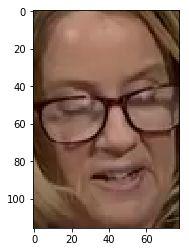

In [90]:
test_image = np_frame[int(first_bbox.y_min):int(first_bbox.y_max),
                     int(first_bbox.x_min):int(first_bbox.x_max)]

img = Image.fromarray(test_image, 'RGB')
imshow(img)

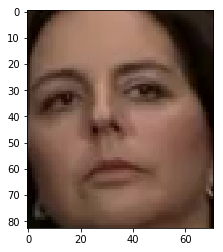

In [91]:
second_bbox = np.ceil(bbox_df.iloc[1])

test_image = np_frame[int(second_bbox.y_min):int(second_bbox.y_max),
                     int(second_bbox.x_min):int(second_bbox.x_max)]

img = Image.fromarray(test_image, 'RGB')
imshow(img)

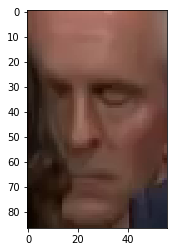

In [92]:
third_bbox = np.ceil(bbox_df.iloc[2])

test_image = np_frame[int(third_bbox.y_min):int(third_bbox.y_max),
                     int(third_bbox.x_min):int(third_bbox.x_max)]

img = Image.fromarray(test_image, 'RGB')
imshow(img)

In [84]:
fn = Facenet()
fn.image_to_embedding(test_image)

array([[-5.64238392e-02,  5.09271286e-02,  2.12095790e-02,
         1.71347726e-02, -1.82928182e-02, -4.93073277e-02,
         2.31739543e-02, -1.40496409e-02,  1.11728214e-01,
        -3.16736102e-03,  1.85099542e-02, -2.61761472e-02,
         2.78348662e-02,  3.96131165e-02,  3.88600901e-02,
        -4.96976860e-02,  3.04598939e-02,  3.68763469e-02,
         2.91246325e-02,  7.41113424e-02, -1.74362790e-02,
         3.59620564e-02, -3.67207057e-03, -3.41942534e-02,
        -6.38963729e-02, -2.53477171e-02,  1.29096732e-02,
         2.22951937e-02,  3.79201956e-02,  2.80427523e-02,
         3.71905901e-02,  7.42248725e-03, -2.64909267e-02,
        -9.74060409e-03, -8.43358412e-03, -5.74322976e-02,
        -3.60876061e-02,  4.27699424e-02,  7.41582438e-02,
        -3.55550535e-02, -1.32491607e-02, -4.92952466e-02,
         6.38389634e-03,  2.37924699e-02, -8.00353196e-03,
        -2.32344996e-02,  1.20314201e-02,  2.20364891e-03,
        -2.28985325e-02, -3.72108817e-02,  6.98230136e-0